In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
from scipy.stats import poisson

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=18)
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


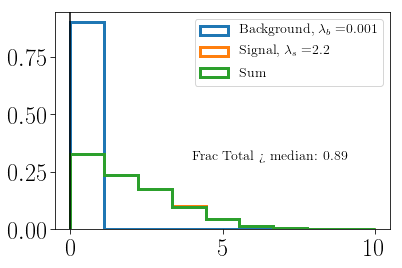

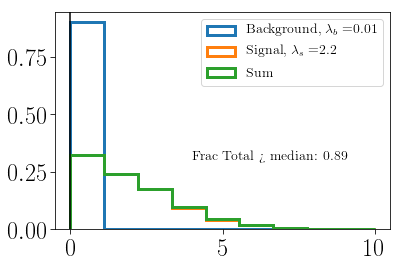

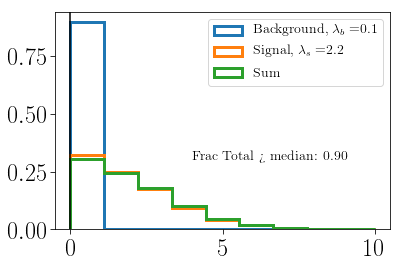

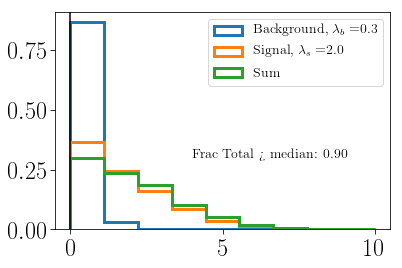

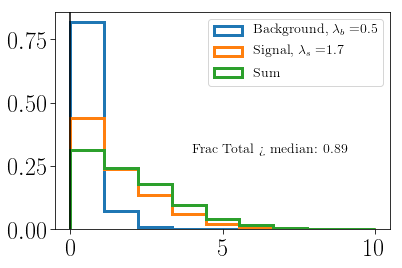

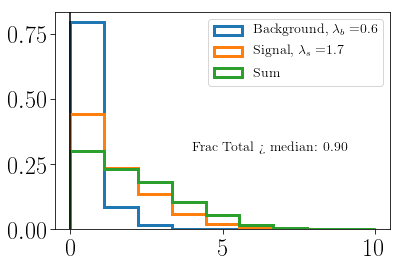

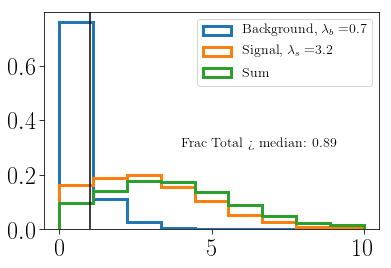

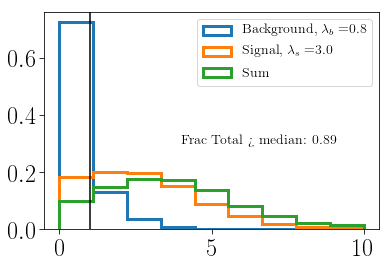

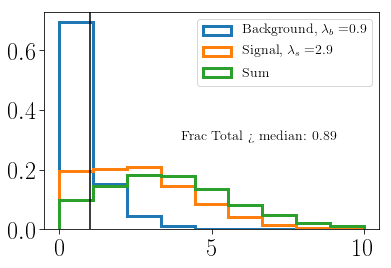

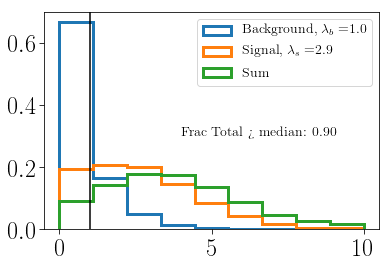

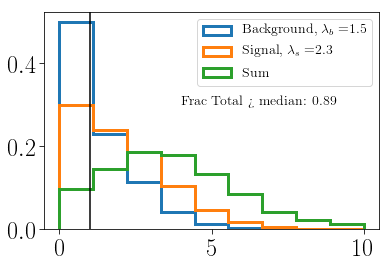

In [2]:
sig_lam = 2.3
for bg_lam in [0.001, 0.01, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.5]:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    found_sig = False
    sig_lam = 2.3
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
    while not found_sig:
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        if frac < 0.9:
            found_sig = True
        else:
            sig_lam += -0.1

    plt.hist(bg, bins = np.linspace(0., 10., 10), histtype='step', lw = 3., label = r'Background, $\lambda_b =${}'.format(bg_lam), density = True)
    plt.hist(sig, bins = np.linspace(0., 10., 10), histtype='step', lw=3., label= r'Signal, $\lambda_s=${}'.format(sig_lam), density=True)
    plt.hist(bg + sig, bins = np.linspace(0., 10., 10), histtype='step', lw=3., label = 'Sum', density=True)
    plt.legend(loc=1, fontsize=14)
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.text(4, 0.3, "Frac Total > median: {:.2f}".format(frac), fontsize = 14)
    
    plt.show()

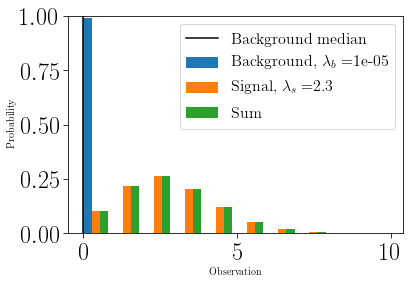

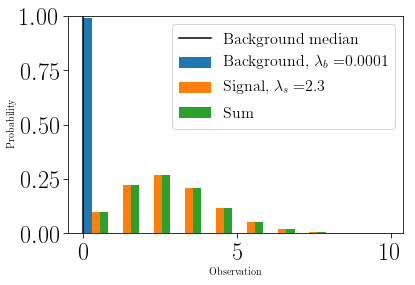

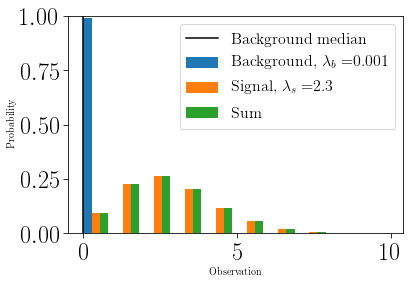

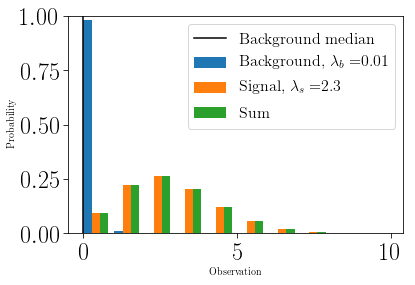

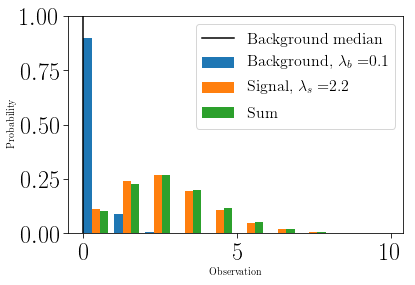

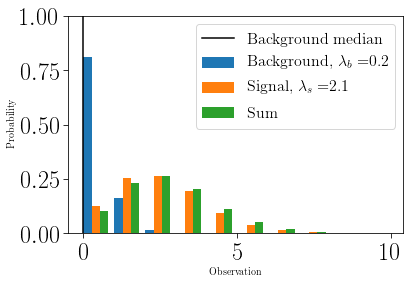

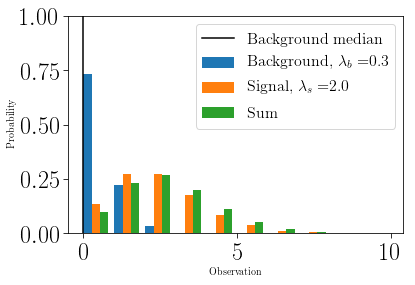

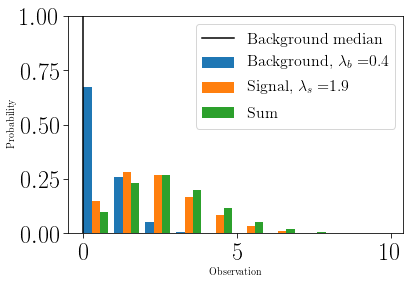

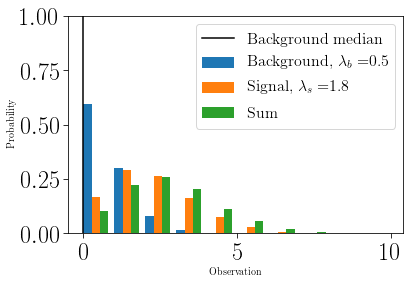

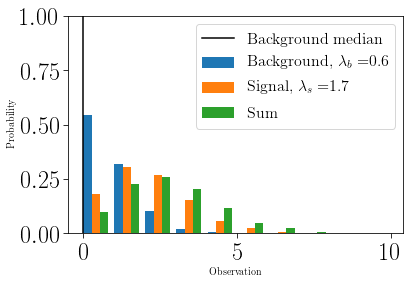

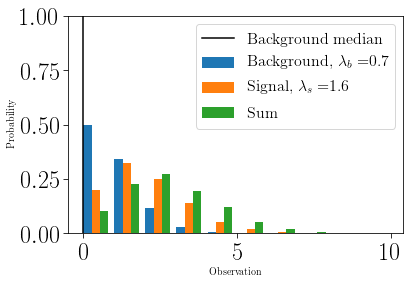

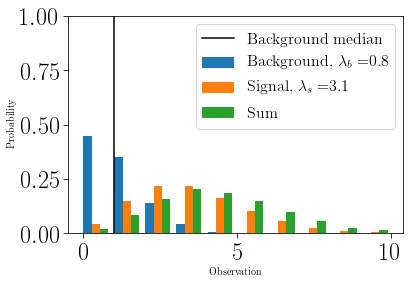

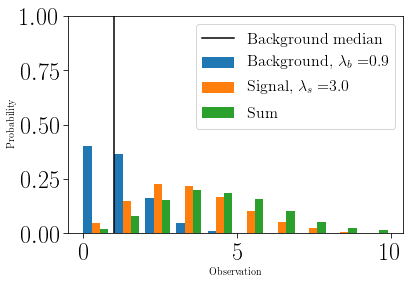

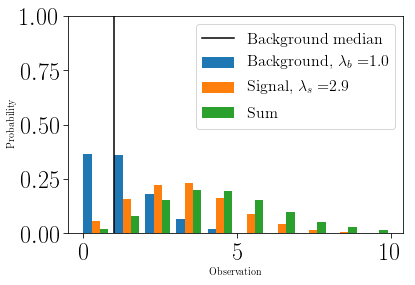

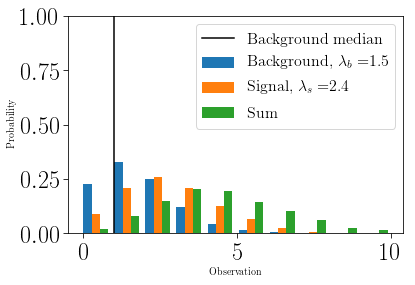

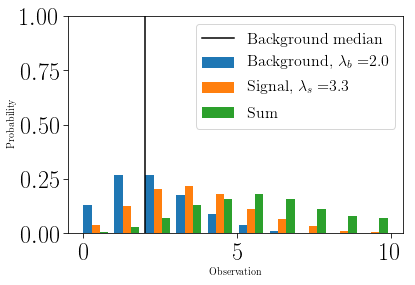

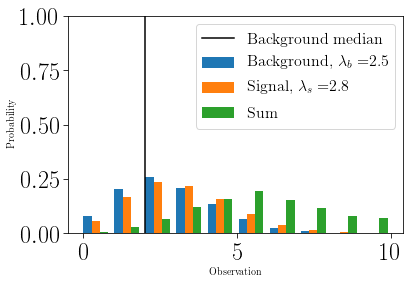

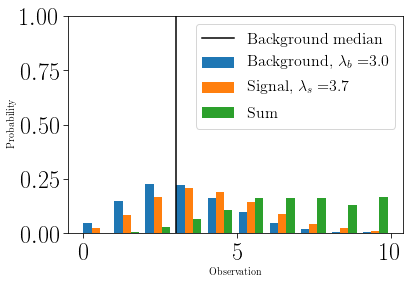

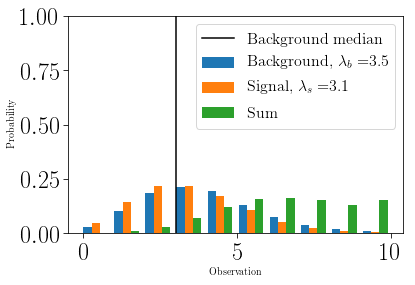

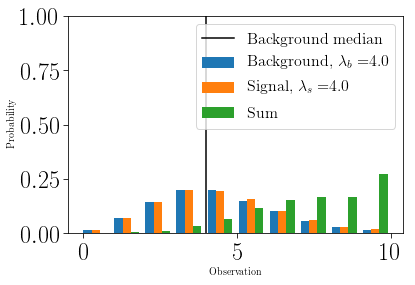

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

sig_lams = np.linspace(1., 5., 41)
needed_flux = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()

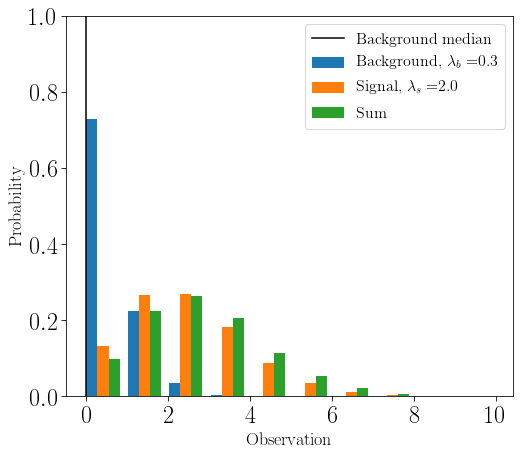

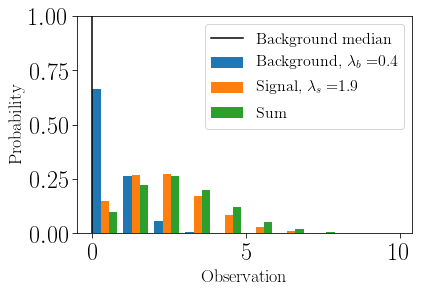

In [139]:
fig, ax = plt.subplots(figsize = (8, 7))

sig_lams = np.linspace(1., 5., 41)
needed_flux = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams[6:8]:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()

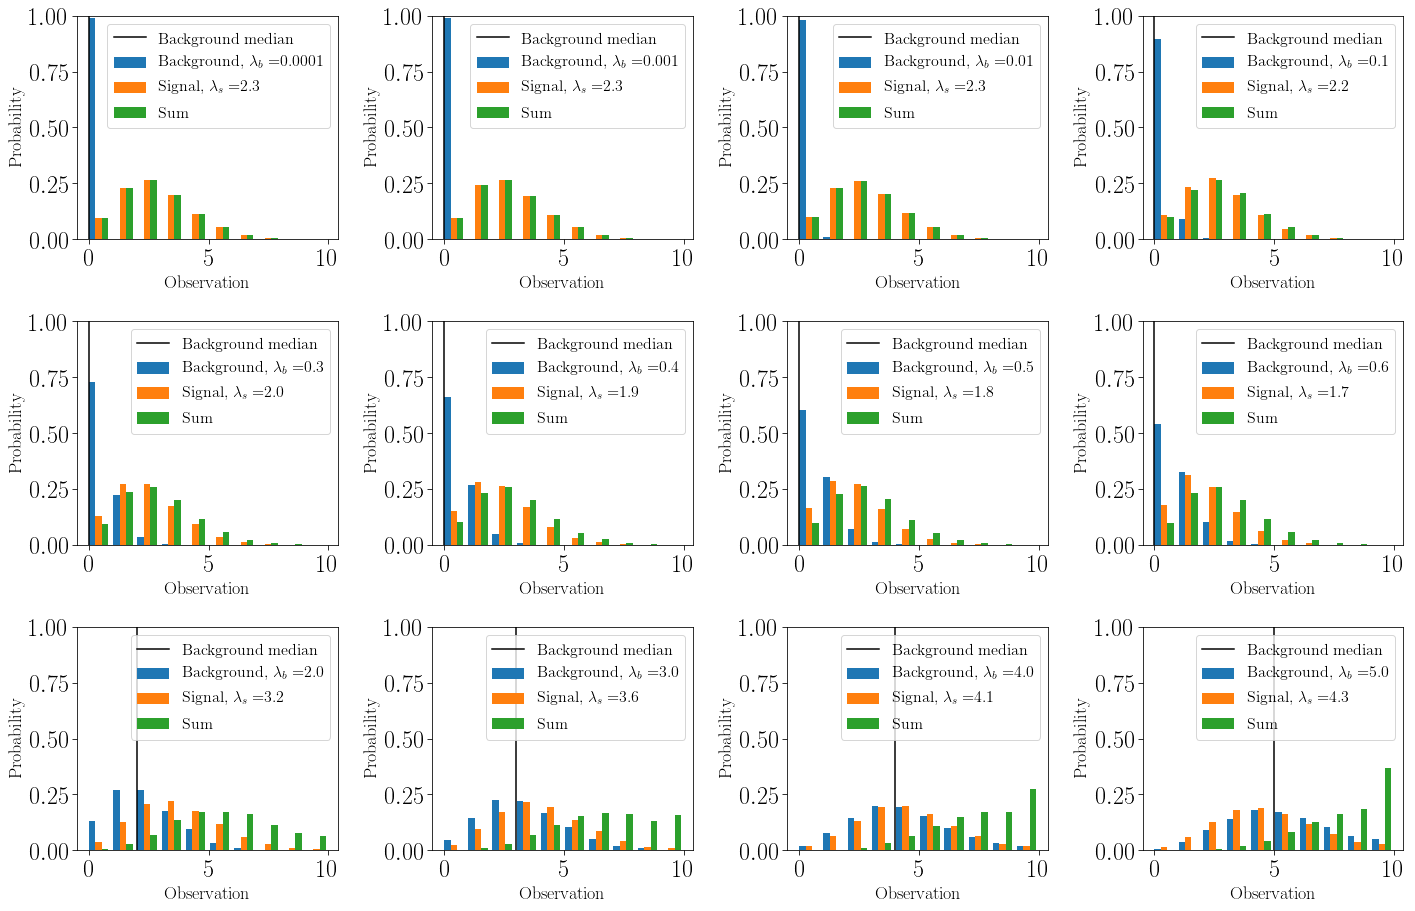

In [140]:
fig, ax = plt.subplots(3,4, figsize = (20, 13))

counter = 1
sig_lams = np.linspace(1., 5., 41)
needed_flux = []
bg_lams = np.append(np.append(np.logspace(-4., -1., 4), np.linspace(.3, .6, 4)), np.linspace(2, 5., 4))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    
    plt.subplot(3,4,counter)
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    counter += 1
    
plt.tight_layout()    
    

In [10]:
sig_lams = np.linspace(1., 5., 100)
needed_flux = []
bg_lams = np.append(np.logspace(-5., -1., 35), np.linspace(.2, 10, 80))
bg_meds = []
sens_analytical = []
sig_max = 50

for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=30000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    bg_meds.append(median)
    
    xvals = np.linspace(0., sig_max, sig_max + 1)
    fine_x_vals = np.linspace(0., sig_max, sig_max * 10.)
    median = np.min(np.argwhere(poisson.cdf(xvals, bg_lam) > 0.5))
    fact_val = 1. / 10.
    test_strengths = sp.special.gammaincc(median + 1, fine_x_vals)
    ind = find_nearest(test_strengths, fact_val)
    sens_analytical.append(fine_x_vals[ind] - bg_lam)

/home/apizzuto/.venvs/analysis/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


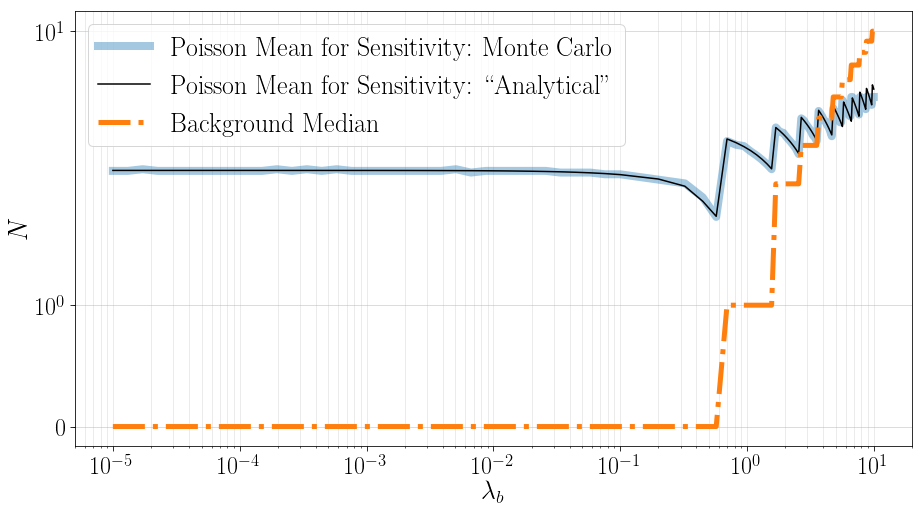

In [11]:
fig, ax = plt.subplots(figsize = (15,8))
fig.set_facecolor('w')

plt.plot(bg_lams, needed_flux, lw=8., label='Poisson Mean for Sensitivity: Monte Carlo', alpha = 0.4)
plt.plot(bg_lams, sens_analytical, c = 'k', label= 'Poisson Mean for Sensitivity: ``Analytical"')
plt.plot(bg_lams, bg_meds, lw=5., label='Background Median', ls = '-.')
plt.xscale('log')
plt.yscale('symlog')
plt.legend(loc=2, fontsize=26)
plt.xlabel(r'$\lambda_{b}$', fontsize = 26)
plt.ylabel(r'$N$', fontsize = 26)
plt.grid(which = 'both', alpha = 0.3)
plt.show()

In [12]:
sig_lams = np.logspace(0.2, 3., 100)
bg_lams_large = np.logspace(1., 3., 50)
bg_meds_large = []
needed_flux_large = []
sens_analytical_large = []
sig_max = 5000

for bg_lam in bg_lams_large:
    bg = np.random.poisson(lam=bg_lam, size=30000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux_large.append(sig_lams[ii])
    bg_meds_large.append(median)
    
    xvals = np.linspace(0., sig_max, sig_max + 1)
    fine_x_vals = np.linspace(0., sig_max, sig_max * 2)
    median = np.min(np.argwhere(poisson.cdf(xvals, bg_lam) > 0.5))
    fact_val = 1. / 10.
    test_strengths = sp.special.gammaincc(median + 1, fine_x_vals)
    ind = find_nearest(test_strengths, fact_val)
    sens_analytical_large.append(fine_x_vals[ind] - bg_lam)

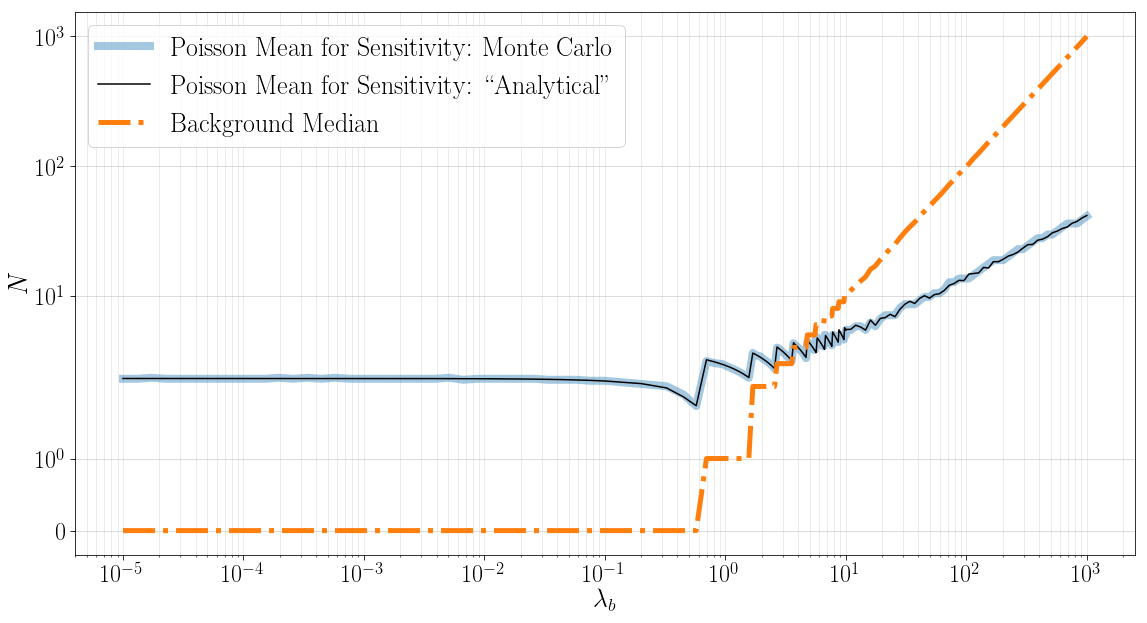

In [14]:
fig, ax = plt.subplots(figsize = (19,10))

plt.plot(np.append(bg_lams, bg_lams_large), np.append(needed_flux, needed_flux_large),
        lw=8., label='Poisson Mean for Sensitivity: Monte Carlo', alpha = 0.4)
plt.plot(np.append(bg_lams, bg_lams_large), np.append(sens_analytical, sens_analytical_large), 
         c = 'k', label= 'Poisson Mean for Sensitivity: ``Analytical"')
plt.plot(np.append(bg_lams, bg_lams_large), np.append(bg_meds, bg_meds_large),
        lw=5., label='Background Median', ls = '-.')
#plt.plot(np.logspace(-5, 3, 100), np.logspace(-5, 3, 100), 
#         label = 'Background Mean', lw = 3.5, c = 'm', ls = ':')
plt.xscale('log')
plt.yscale('symlog')
plt.legend(loc=2, fontsize=26)
plt.xlabel(r'$\lambda_{b}$', fontsize = 26)
plt.ylabel(r'$N$', fontsize = 26)
plt.grid(which = 'both', alpha = 0.3)
plt.show()

# Repeating with comparing to background mean, not median

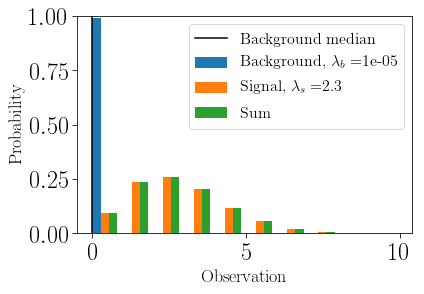

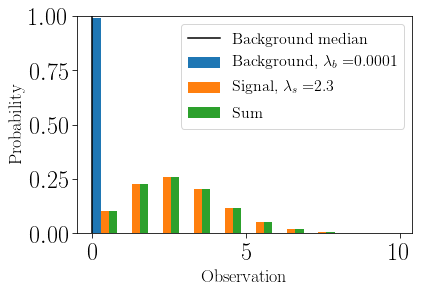

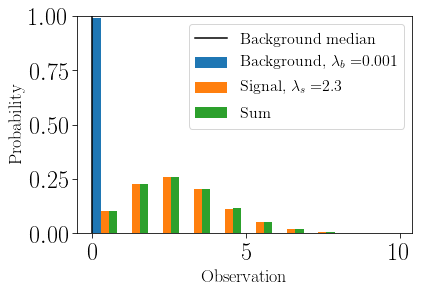

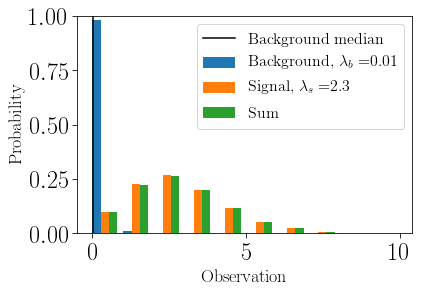

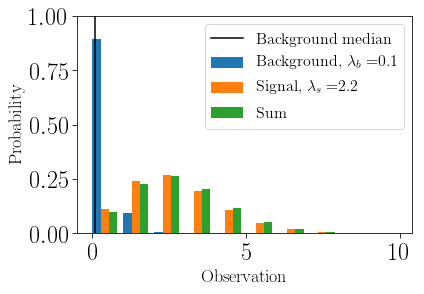

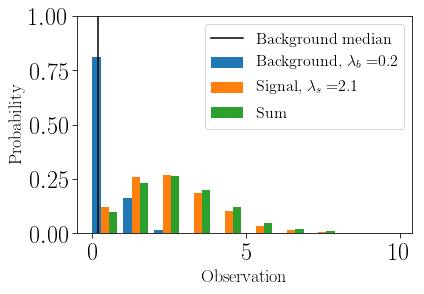

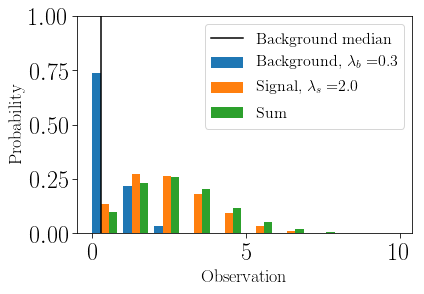

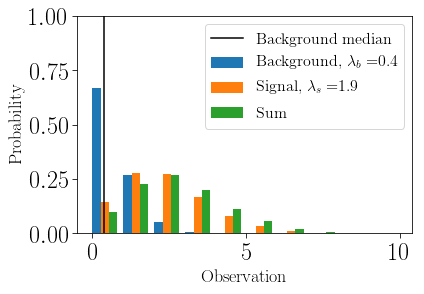

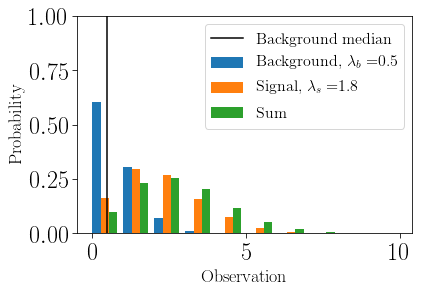

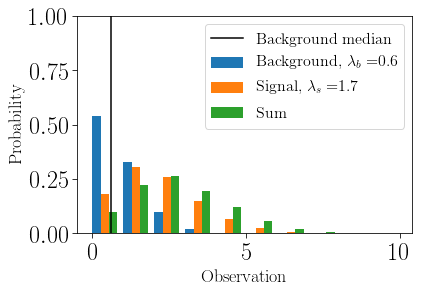

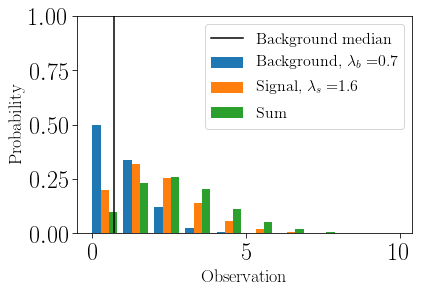

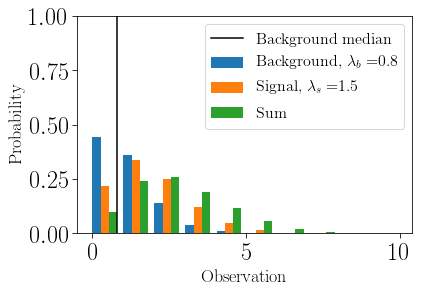

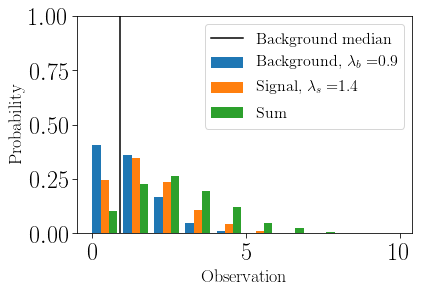

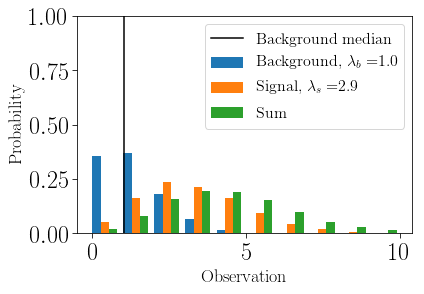

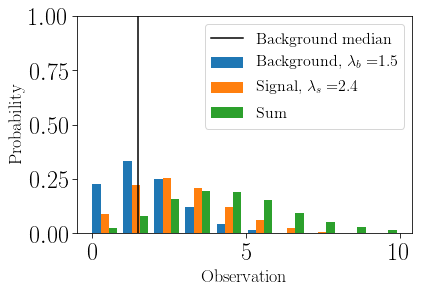

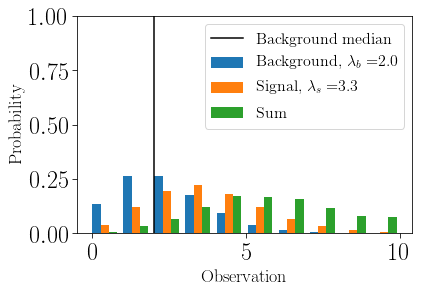

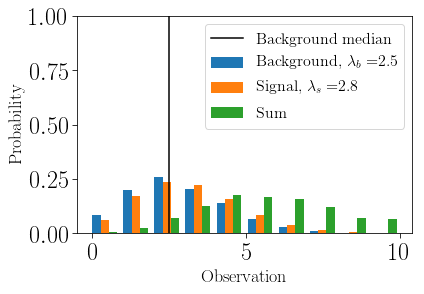

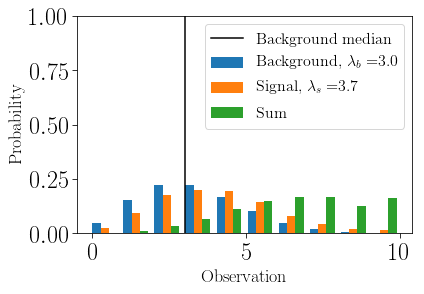

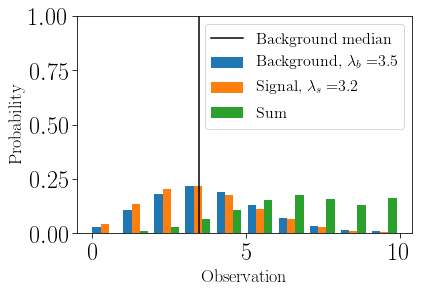

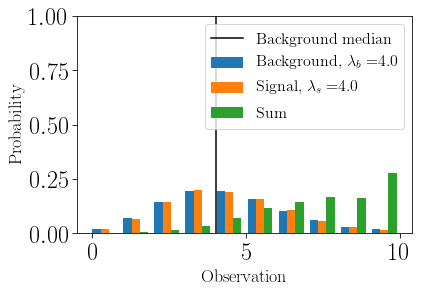

In [6]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

sig_lams = np.linspace(1., 5., 41)
needed_flux_mean = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    mean = np.mean(bg)
    sig_fracs_mean = []
    sigs_mean = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
        sigs_mean.append(sig)
    ii = find_nearest(sig_fracs_mean, 0.9)
    sig = sigs_mean[ii]
    total = bg + sig
    needed_flux_mean.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(mean, c = 'k', label = 'Background Mean')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()

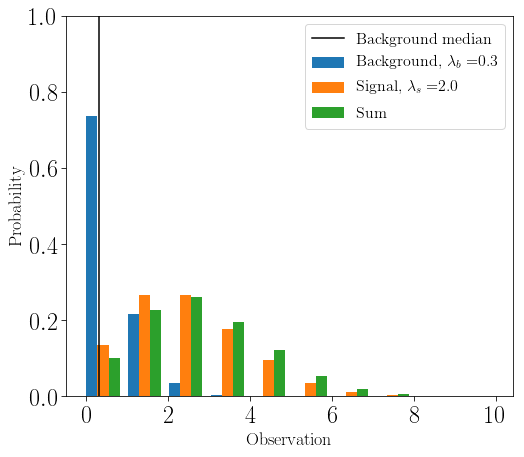

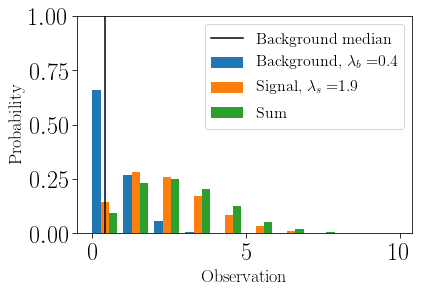

In [7]:
fig, ax = plt.subplots(figsize = (8, 7))
sig_lams = np.linspace(1., 5., 41)
needed_flux_mean = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams[6:8]:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    mean = np.mean(bg)
    sig_fracs_mean = []
    sigs_mean = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
        sigs_mean.append(sig)
    ii = find_nearest(sig_fracs_mean, 0.9)
    sig = sigs_mean[ii]
    total = bg + sig
    needed_flux_mean.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(mean, c = 'k', label = 'Background Mean')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()


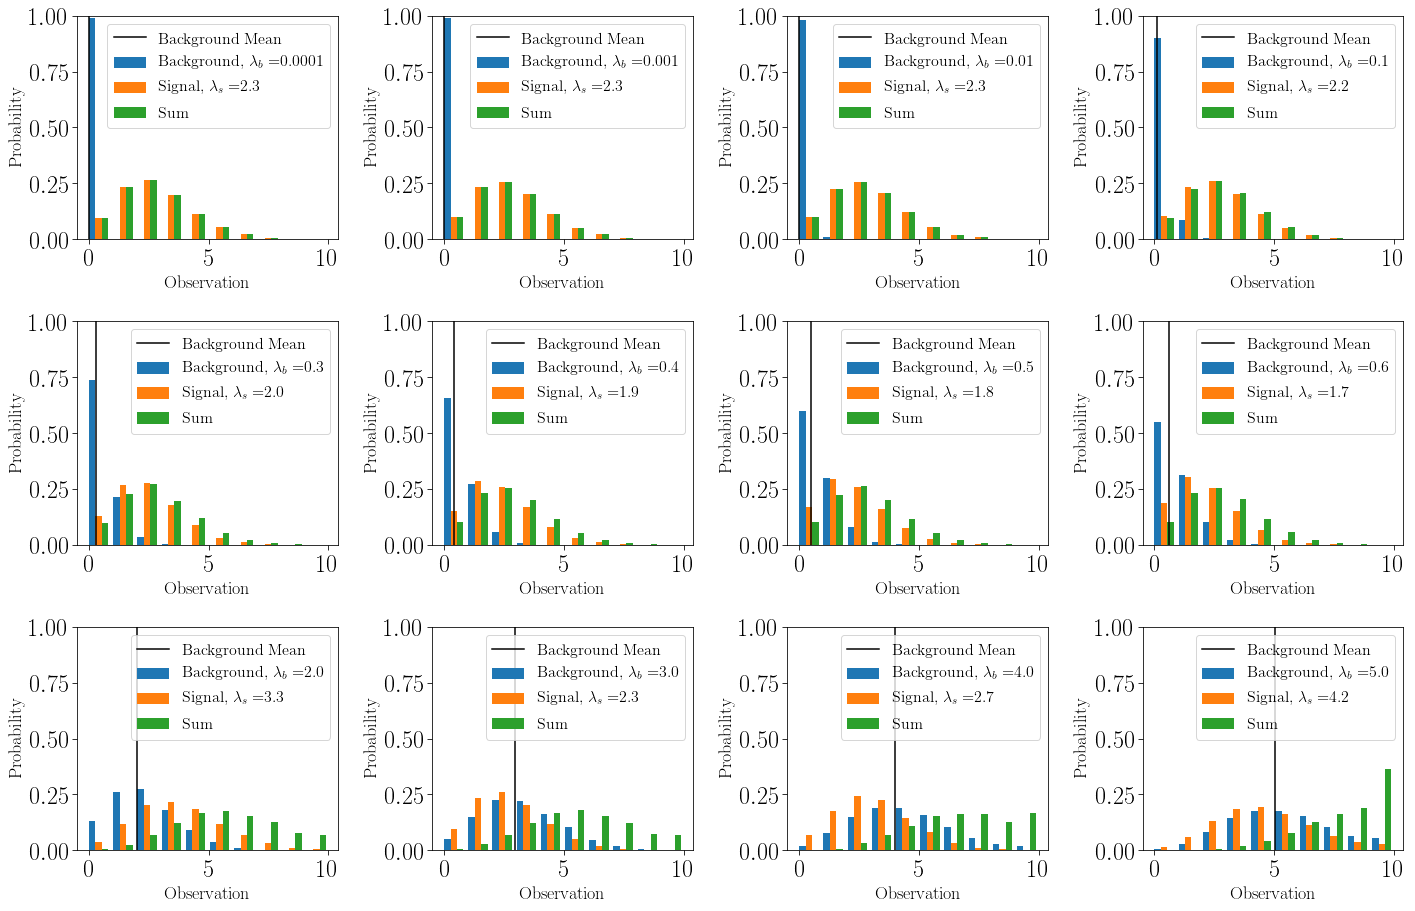

In [10]:
fig, ax = plt.subplots(3,4, figsize = (20, 13))

counter = 1
sig_lams = np.linspace(1., 5., 41)
needed_flux_mean = []
bg_lams = np.append(np.append(np.logspace(-4., -1., 4), np.linspace(.3, .6, 4)), np.linspace(2, 5., 4))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    mean = np.mean(bg)
    sig_fracs_mean = []
    sigs_mean = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
        sigs_mean.append(sig)
    ii = find_nearest(sig_fracs_mean, 0.9)
    sig = sigs_mean[ii]
    total = bg + sig
    needed_flux_mean.append(sig_lams[ii])
    
    plt.subplot(3,4,counter)
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(mean, c = 'k', label = 'Background Mean')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    counter += 1
    
plt.tight_layout()    
    

In [7]:
sig_lams = np.linspace(1., 5., 100)
needed_flux = []
needed_flux_mean = []
bg_lams = np.append(np.logspace(-5., -1., 35), np.linspace(.2, 10, 80))
bg_meds = []
bg_means = []
sens_analytical = []
sig_max = 50

for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=30000)
    median = np.median(bg)
    sig_fracs = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
    ii = find_nearest(sig_fracs, 0.9)
    needed_flux.append(sig_lams[ii])
    bg_meds.append(median)
    
    mean = np.mean(bg)
    sig_fracs_mean = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
    ii = find_nearest(sig_fracs_mean, 0.9)
    needed_flux_mean.append(sig_lams[ii])
    bg_means.append(bg_means)
    
    
    xvals = np.linspace(0., sig_max, sig_max + 1)
    fine_x_vals = np.linspace(0., sig_max, sig_max * 10.)
    median = np.min(np.argwhere(poisson.cdf(xvals, bg_lam) > 0.5))
    fact_val = 1. / 10.
    test_strengths = sp.special.gammaincc(median + 1, fine_x_vals)
    ind = find_nearest(test_strengths, fact_val)
    sens_analytical.append(fine_x_vals[ind] - bg_lam)

/home/apizzuto/.venvs/analysis/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


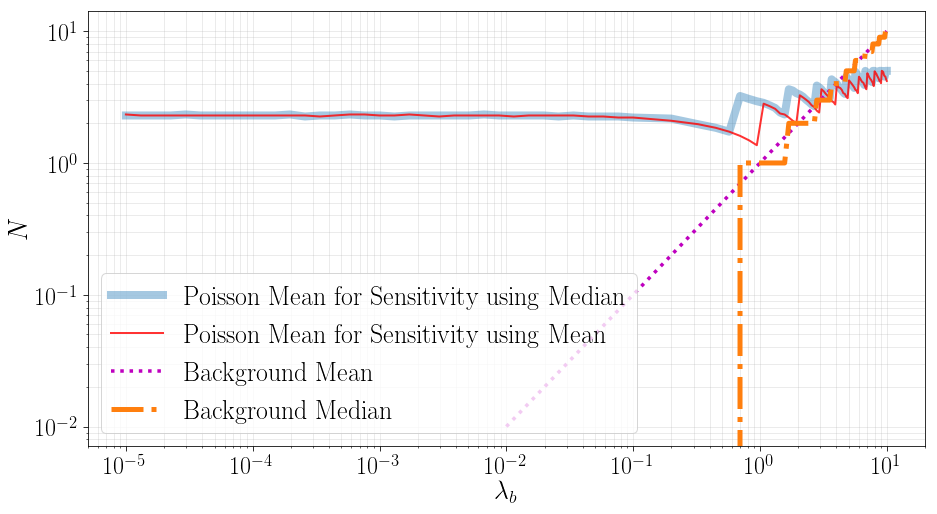

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
fig.set_facecolor('w')

plt.plot(bg_lams, needed_flux, lw=8., label='Poisson Mean for Sensitivity using Median', alpha = 0.4)
plt.plot(bg_lams, needed_flux_mean, lw=2., label='Poisson Mean for Sensitivity using Mean', alpha = 0.8, c = 'r')
#plt.plot(bg_lams, sens_analytical, c = 'k', label= 'Poisson Mean for Sensitivity: ``Analytical"')
plt.plot(np.logspace(-2, 1, 100), np.logspace(-2, 1, 100), 
         label = 'Background Mean', lw = 3.5, c = 'm', ls = ':')
plt.plot(bg_lams, bg_meds, lw=5., label='Background Median', ls = '-.')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=3, fontsize=26)
plt.xlabel(r'$\lambda_{b}$', fontsize = 26)
plt.ylabel(r'$N$', fontsize = 26)
plt.grid(which = 'both', alpha = 0.3)
plt.show()

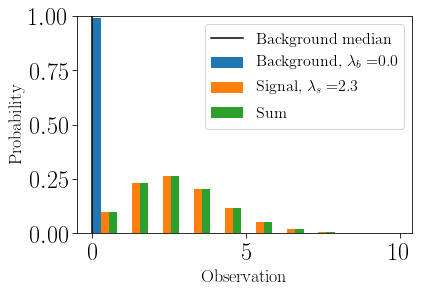

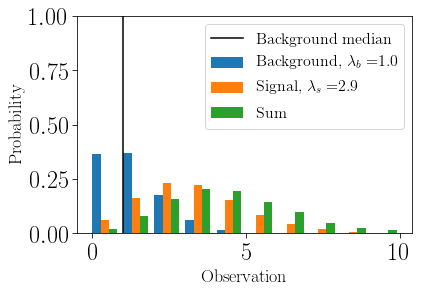

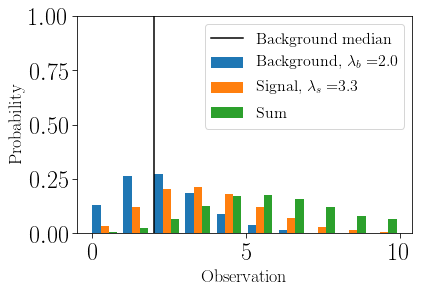

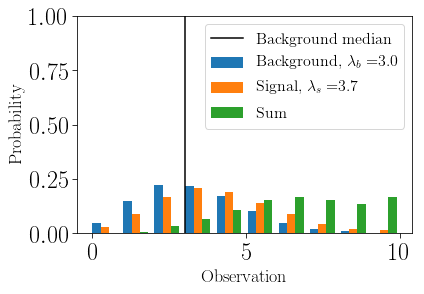

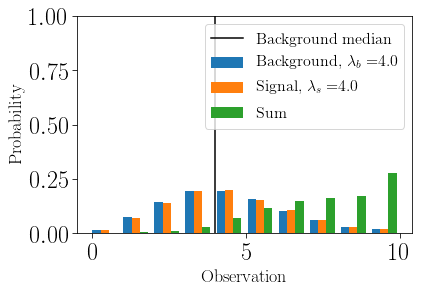

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

sig_lams = np.linspace(1., 5., 41)
needed_flux = []
#bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))

bg_lams = [0.0, 1.0, 2.0, 3.0, 4.0]
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()